In [2]:
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline

np.random.seed(10)

In [3]:
male_mean=178
male_sd= 7.7

In [4]:
female_mean=163
female_sd=7.3

In [6]:
male_height = stats.norm(male_mean, male_sd)
female_height=stats.norm(female_mean, female_sd)

In [8]:
def evaluate_pdf(rv,x=4):
    #evaluating the mean and standard deviation of random variable in our distribution
    mean=rv.mean()
    sd=rv.std()
    #using numpy to calculate the evenly spaced numbers over a specified interval
    xs=np.linspace(mean-x*sd,mean+x*sd,)
    #calculate the peak of the normal distribution
    yxs=rv.pdf(xs)
    return xs,yxs

Text(0.5, 0, 'height (cm)')

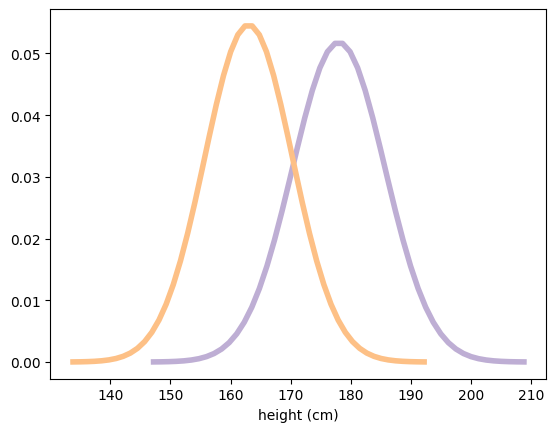

In [9]:
#Male height
xs, yx = evaluate_pdf(male_height)
plt.plot(xs, yx, label='male', linewidth=4, color='#beaed4')

#Female height
xs, yx = evaluate_pdf(female_height)
plt.plot(xs, yx, label='female', linewidth=4, color='#fdc086')
 
plt.xlabel('height (cm)')

In [10]:
male_sample=male_height.rvs(1000)
female_sample=female_height.rvs(1000)

In [13]:
mean1,sd1 =male_sample.mean(),male_sample.std()
mean1,sd1

(np.float64(177.88791390576085), np.float64(7.222274730410271))

In [14]:
mean2,sd2 =female_sample.mean(),female_sample.std()
mean2,sd2

(np.float64(162.91903182040372), np.float64(7.261850929417819))

In [15]:
mean_difference = mean1 - mean2
mean_difference

np.float64(14.968882085357137)

In [16]:
#quantifying the difference
#percentage of the mean ----relative
relative_difference = mean_difference / mean1
percentage_difference = relative_difference * 100
percentage_difference

np.float64(8.414783082614122)

In [17]:
relative_difference2 = mean_difference / mean2
percentage_difference2 = relative_difference2 * 100
percentage_difference2

np.float64(9.18792722869745)

In [19]:
simple_overlap_ratio = (mean1 + mean2) / 2
simple_overlap_ratio

np.float64(170.4034728630823)

In [21]:
overlap_ratio = sd1*mean2 + sd2*mean1/(sd1+sd2)
overlap_ratio

np.float64(1265.8329926527842)

In [23]:
#Cohen's d function
def cohensd (group1, group2):
    difference_mean= group1.mean() - group2.mean()
    n1=len(group1)
    n2=len(group2)
    v1=group1.var()
    v2=group2.var()
    pooled_variance = n1*v1 + n2*v2 / (v1 + v2)
    pooled_std= np.sqrt(pooled_variance)
    d=difference_mean/pooled_std 
    return cohensd

In [24]:
#call the function
d=cohensd(male_sample,female_sample)
d

<function __main__.cohensd(group1, group2)>